In [2]:
# import numpy as np
# import pandas as pd
# from sklearn.datasets import make_classification
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.model_selection import cross_validate
# from xgboost import XGBClassifier

# data = pd.read_csv('pseudodata_præoperation.csv')
# y = np.random.choice([0,1],size = len(data))

# X = data.to_numpy()

In [5]:
# num_negative = np.sum(y == 0)
# num_positive = np.sum(y == 1)
# scale_pos_weight = num_negative / num_positive
# scale_pos_weight

0.9721362229102167

In [ ]:
# weights = [scale_pos_weight*0.25,scale_pos_weight*0.5,scale_pos_weight*0.75,scale_pos_weight,scale_pos_weight*1.75,scale_pos_weight*1.5,scale_pos_weight*2]

In [ ]:
# import numpy as np
# from skopt import BayesSearchCV
# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split, cross_validate
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# from xgboost import XGBClassifier
# from skopt.space import Real, Integer

# # # Generate synthetic data
# # X, y = make_classification(n_samples=6000, n_features=20, random_state=42)

# # Split data into training and hold-out sets
# X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=1/6, random_state=42)

# # Calculate scale_pos_weight based on training data
# num_negative = np.sum(y_train == 0)
# num_positive = np.sum(y_train == 1)
# scale_pos_weight = num_negative / num_positive

# # Initialize XGBoost classifier
# model = XGBClassifier()

# # Define the hyperparameter space
# param_space = {
#     'n_estimators': Integer(10, 5000),
#     'max_depth': Integer(1, 10),
#     'learning_rate': Real(0.001, 0.01, prior='log-uniform'),
#     'subsample': Real(0.6, 1.0),
#     'colsample_bytree': Real(0.6, 1.0),
#     'gamma': Real(0, 5),
#     'scale_pos_weight': Real(scale_pos_weight*0.25, scale_pos_weight*2)
# }

# # Define the scoring metrics
# scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# # Initialize BayesSearchCV
# opt = BayesSearchCV(
#     estimator=model,
#     search_spaces=param_space,
#     scoring=scoring,
#     n_iter=50,  # Number of iterations for Bayesian optimization
#     cv=5,  # Number of cross-validation folds
#     n_jobs=-1,
#     return_train_score=True,
#     refit='roc_auc',  # Refit the best model on the entire training set using ROC AUC
#     random_state=42
# )

# # Perform Bayesian optimization
# opt.fit(X_train, y_train)

# # Evaluate on hold-out set
# y_pred_holdout = opt.predict(X_holdout)
# print("Hold-Out Set Metrics:")
# for metric in scoring:
#     if metric in ['accuracy', 'precision', 'recall', 'f1']:
#         score = globals()[f"{metric}_score"](y_holdout, y_pred_holdout)
#     elif metric == 'roc_auc':
#         score = roc_auc_score(y_holdout, opt.predict_proba(X_holdout)[:, 1])
#     print(f"{metric.capitalize()}: {score}")

# # Print the best parameters and the best score
# print("Best parameters:", opt.best_params_)
# print("Best ROC AUC:", opt.best_score_)


In [4]:
# Real(scale_pos_weight*0.25, scale_pos_weight*2)

Real(low=0.25, high=2.0, prior='uniform', transform='identity')

In [ ]:
# from xgboost import XGBClassifier
# from skopt.space import Real, Integer
# from skopt import BayesSearchCV

# # Initialize the classifier with learning rate
# model = XGBClassifier(learning_rate=0.1, max_depth=6, n_estimators=100)

# scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# # Define the hyperparameter space
# param_space = {
#     'n_estimators': Integer(10, 100),
#     'max_depth': Integer(1, 20),
#     'learning_rate': Real(0.001, 0.01, prior='log-uniform'),
#     'min_samples_split': Integer(2, 20),
#     'min_samples_leaf': Integer(1, 20)
# }

# # Define the scoring metrics
# scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# # Initialize BayesSearchCV
# opt = BayesSearchCV(
#     estimator=model,
#     search_spaces=param_space,
#     scoring='roc_auc',  # This is the primary scoring metric for optimization
#     n_iter=50,
#     cv=5,
#     n_jobs=-1,
#     return_train_score=True,
#     refit='roc_auc'
# )

# # Perform the optimization
# opt.fit(X, y)

# # Print the best parameters and the best score
# print("Best parameters:", opt.best_params_)
# print("Best ROC AUC:", opt.best_score_)

# # Optionally, evaluate other metrics using cross_validate
# best_model = opt.best_estimator_
# additional_scores = ['accuracy', 'precision', 'recall', 'f1']
# cross_val_scores = cross_validate(best_model, X, y, scoring=additional_scores, cv=5, n_jobs=-1, return_train_score=True)


# scores = cross_validate(model, X, y, scoring=scoring, cv=5, n_jobs=-1, return_train_score=True)

# for metric in scoring:
#     print(f"{metric.capitalize()}: {scores['test_' + metric].mean()}")

# for metric in scoring:
#     print(f"Train {metric.capitalize()}: {scores['train_' + metric].mean()}")



In [ ]:
# # evaluate xgboost algorithm for classification
# import numpy as np
# import pandas as pd
# from sklearn.datasets import make_classification
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from xgboost import XGBClassifier
# # define dataset
# # data = pd.read_csv('x_matricer/x_matrix_pre_4729.csv', compression='gzip').sort_values(by='IDno',ignore_index=True).drop(columns='IDno')
# # y_pred = pd.read_csv('y_pred_4729.csv').sort_values(by='IDno',ignore_index=True).drop(columns='IDno')

# data = pd.read_csv('pseudodata_præoperationer.csv', compression='gzip').sort_values(by='IDno',ignore_index=True).drop(columns='IDno')
# y = np.random.choice([0,1],size = len(data))

# # Convert to numpy array and generate synthetic labels for demonstration
# X = data.to_numpy()
# # y = y_pred.to_numpy()
# # define the model
# model = XGBClassifier()
# # evaluate the model
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, X, y, scoring = 'accuracy', cv=cv, n_jobs=-1)
# # report performance
# print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

In [ ]:
# from xgboost import XGBRegressor
# from numpy import mean
# from numpy import std
# from sklearn.datasets import make_regression
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedKFold
# model = XGBRegressor()
# # evaluate the model
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# # report performance
# print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [ ]:
# # explore xgboost number of trees effect on performance
# from numpy import mean
# from numpy import std
# from sklearn.datasets import make_classification
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from xgboost import XGBClassifier
# from matplotlib import pyplot



# # get a list of models to evaluate
# def get_models():
# 	models = dict()
# 	trees = [10, 50, 100, 500, 1000, 5000]
# 	for n in trees:
# 		models[str(n)] = XGBClassifier(n_estimators=n)
# 	return models

# # evaluate a give model using cross-validation
# def evaluate_model(model):
# 	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# 	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# 	return scores

# # get the models to evaluate
# models = get_models()
# # evaluate the models and store results
# results, names = list(), list()
# for name, model in models.items():
# 	scores = evaluate_model(model)
# 	results.append(scores)
# 	names.append(name)
# 	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# # plot model performance for comparison
# pyplot.boxplot(results, labels=names, showmeans=True)
# pyplot.show()

In [ ]:
# # explore xgboost tree depth effect on performance
# from numpy import mean
# from numpy import std
# from sklearn.datasets import make_classification
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from xgboost import XGBClassifier
# from matplotlib import pyplot


# # get a list of models to evaluate
# def get_models():
# 	models = dict()
# 	for i in range(1,11):
# 		models[str(i)] = XGBClassifier(max_depth=i)
# 	return models

# # evaluate a give model using cross-validation
# def evaluate_model(model):
# 	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# 	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# 	return scores


# # get the models to evaluate
# models = get_models()
# # evaluate the models and store results
# results, names = list(), list()
# for name, model in models.items():
# 	scores = evaluate_model(model)
# 	results.append(scores)
# 	names.append(name)
# 	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# # plot model performance for comparison
# pyplot.boxplot(results, labels=names, showmeans=True)
# pyplot.show()

In [ ]:
# # explore xgboost learning rate effect on performance
# from numpy import mean
# from numpy import std
# from sklearn.datasets import make_classification
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from xgboost import XGBClassifier
# from matplotlib import pyplot

# # get the dataset
# def get_dataset():
# 	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# 	return X, y

# # get a list of models to evaluate
# def get_models():
# 	models = dict()
# 	rates = [0.00001, 0.001, 0.01, 0.1, 1.0]
# 	for i in range(1,11):
# 		for r in rates:
# 			key = '%.4f' % r
# 			models[(str(i),key)] = XGBClassifier(max_depth=i,eta=r)
# 	return models

# # evaluate a give model using cross-validation
# def evaluate_model(model):
# 	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# 	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# 	return scores


# # get the models to evaluate
# models = get_models()
# # evaluate the models and store results
# results, names = list(), list()
# for name, model in models.items():
# 	scores = evaluate_model(model)
# 	results.append(scores)
# 	names.append(name)
# 	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# # plot model performance for comparison
# pyplot.boxplot(results, labels=names, showmeans=True)
# pyplot.show()

In [ ]:
# # explore xgboost subsample ratio effect on performance
# from numpy import arange
# from numpy import mean
# from numpy import std
# from sklearn.datasets import make_classification
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from xgboost import XGBClassifier
# from matplotlib import pyplot

# # get the dataset
# def get_dataset():
# 	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# 	return X, y

# # get a list of models to evaluate
# def get_models():
# 	models = dict()
# 	for i in arange(0.1, 1.1, 0.1):
# 		key = '%.1f' % i
# 		models[key] = XGBClassifier(subsample=i)
# 	return models

# # evaluate a give model using cross-validation
# def evaluate_model(model):
# 	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# 	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# 	return scores


# # get the models to evaluate
# models = get_models()
# # evaluate the models and store results
# results, names = list(), list()
# for name, model in models.items():
# 	print(name)
# 	scores = evaluate_model(model)
# 	results.append(scores)
# 	names.append(name)
# 	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# # plot model performance for comparison
# pyplot.boxplot(results, labels=names, showmeans=True)
# pyplot.show()

## Prøv den her
Start med færre parametre

In [16]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score


# Load and preprocess data
# data = pd.read_csv('x_matricer/x_matrix_pre_4729.csv', compression='gzip').sort_values(by='IDno', ignore_index=True).drop(columns='IDno')
# y_pred = pd.read_csv('y_pred_4729.csv').sort_values(by='IDno', ignore_index=True).drop(columns='IDno')
# X = data.to_numpy()
# y = y_pred.to_numpy().flatten()

# # Standardize the data
# X = StandardScaler().fit_transform(X)

data1 = pd.read_csv('x_matricer/x_matrix_pre_4729.csv', compression = 'gzip').sort_values(by='IDno',ignore_index=True).drop(columns='IDno')
data2 = pd.read_csv('x_matricer/x_matrix_phase_1_4729.csv', compression = 'gzip').sort_values(by='IDno',ignore_index=True).drop(columns='IDno')
data3 = pd.read_csv('x_matricer/x_matrix_phase_2_4729.csv', compression = 'gzip').sort_values(by='IDno',ignore_index=True).drop(columns='IDno')
data4 = pd.read_csv('x_matricer/x_matrix_phase_3_4729.csv', compression = 'gzip').sort_values(by='IDno',ignore_index=True).drop(columns='IDno')
data5 = pd.read_csv('x_matricer/x_matrix_phase_4_4729.csv', compression = 'gzip').sort_values(by='IDno',ignore_index=True).drop(columns='IDno')
data6 = pd.read_csv('x_matricer/x_matrix_phase_5_4729.csv', compression = 'gzip').sort_values(by='IDno',ignore_index=True).drop(columns='IDno')
y_pred = pd.read_csv('y_pred_4729.csv').sort_values(by='IDno',ignore_index=True).drop(columns='IDno')

base = data1
phase1 = pd.concat([data1, data2], axis = 1)
phase2 = pd.concat([data1, data2, data3], axis = 1)
phase3 = pd.concat([data1, data2, data3, data4], axis = 1)
phase4 = pd.concat([data1, data2, data3, data4, data5], axis = 1)
phase5 = pd.concat([data1, data2, data3, data4, data5, data6], axis = 1)
data_list = [base, phase1, phase2, phase3, phase4, phase5]

preds_log = []
models_log = []
holdout_log = []
true_log = []

for i in range(len(data_list)):
    print(i)
    data = data_list[i]

    y = np.random.choice([0,1],size = len(data))

    X = data.to_numpy()

    X = StandardScaler().fit_transform(X)

    # Split data into holdout set and remaining set
    X_train, X_holdout, y_train, y_holdout = train_test_split(X,y, test_size=500, random_state=42, stratify=y)

    num_negative = np.sum(y == 0)
    num_positive = np.sum(y == 1)
    scale_pos_weight = num_negative / num_positive

    # Create a DMatrix for XGBoost
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dholdout = xgb.DMatrix(X_holdout, label=y_holdout)

    # Define a simple parameter grid for hyperparameter tuning
    # param_grid = {
    #     'max_depth': [3, 5, 7],
    #     'learning_rate': [0.0001, 0.001, 0.01, 0.3],
    #     'n_estimators': [10, 50, 100, 500, 1000, 5000],
    #     'scale_pos_weight': [0.1*scale_pos_weight,scale_pos_weight,scale_pos_weight*1.5,scale_pos_weight*2],  # Adjust for class imbalance, 
    # }

    param_grid = {
        'max_depth': [5],
        'learning_rate': [0.001],
        'n_estimators': [100],
        'scale_pos_weight': [scale_pos_weight*2],  # Adjust for class imbalance, 
    }

    # Initialize a XGBoost model
    xgb_model = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss', early_stopping_rounds=10)

    scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

    # Perform Grid Search with Cross-Validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='roc_auc', cv=cv, verbose=1, n_jobs=-1)

    # Custom fit method to include eval_set for early stopping
    def fit_with_early_stopping(estimator, X, y, **fit_params):
        eval_set = [(X_holdout, y_holdout)]
        return estimator.fit(X, y, eval_set=eval_set, **fit_params)

    # Monkey-patch the fit method of the GridSearchCV instance
    grid_search.fit = lambda X, y, **fit_params: fit_with_early_stopping(grid_search.estimator, X, y, **fit_params)

    # Fit the model
    grid_search.fit(X_train, y_train)

    # Print the best parameters found
    print(f'Best parameters found: {grid_search.best_params_}')
    print(f'Best cross-validation accuracy: {grid_search.best_score_:.5f}')

    # Train the final model with the best parameters
    best_model = grid_search.best_estimator_
    best_model.fit(X_train, y_train)

    # Evaluate the final model on the holdout set
    y_holdout_pred = best_model.predict(X_holdout)
    accuracy = accuracy_score(y_holdout, y_holdout_pred)
    precision = precision_score(y_holdout, y_holdout_pred)
    recall = recall_score(y_holdout, y_holdout_pred)
    f1 = f1_score(y_holdout, y_holdout_pred)

    models_log.append(best_model)
    #holdout_log.append(holdout_loader)
    true_log.append(y_holdout)
    preds_log.append(y_holdout_pred)

    print(f'Final Model Accuracy on Holdout Set: {accuracy * 100:.2f}%')
    print(f'Holdout Set Precision: {precision * 100:.2f}%')
    print(f'Holdout Set Recall: {recall * 100:.2f}%')
    print(f'Holdout Set F1 Score: {f1 * 100:.2f}%')

    with open('XGB_output.txt', 'a') as file:
        print(f"Phase {i + 1}", file=file)
        print(f'Best parameters: {grid_search.best_params_}', file=file)
        print(f'Final Model F1 Score on Holdout Set: {f1:.4f}', file=file)
        print(f'Holdout Set Accuracy: {accuracy * 100:.2f}%', file=file)
        print(f'Holdout Set Precision: {precision * 100:.2f}%', file=file)
        print(f'Holdout Set Recall: {recall * 100:.2f}%', file=file)
        print('\n', file=file)
        print('Output written to output.txt')


0
[0]	validation_0-logloss:0.69486
[1]	validation_0-logloss:0.70167
[2]	validation_0-logloss:0.70184
[3]	validation_0-logloss:0.70499
[4]	validation_0-logloss:0.70879
[5]	validation_0-logloss:0.71162
[6]	validation_0-logloss:0.71646
[7]	validation_0-logloss:0.71523
[8]	validation_0-logloss:0.71543
[9]	validation_0-logloss:0.71192
[10]	validation_0-logloss:0.71365


AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [21]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score

# Load and preprocess data
data1 = pd.read_csv('x_matricer/x_matrix_pre_4729.csv', compression='gzip').sort_values(by='IDno', ignore_index=True).drop(columns='IDno')
data2 = pd.read_csv('x_matricer/x_matrix_phase_1_4729.csv', compression='gzip').sort_values(by='IDno', ignore_index=True).drop(columns='IDno')
data3 = pd.read_csv('x_matricer/x_matrix_phase_2_4729.csv', compression='gzip').sort_values(by='IDno', ignore_index=True).drop(columns='IDno')
data4 = pd.read_csv('x_matricer/x_matrix_phase_3_4729.csv', compression='gzip').sort_values(by='IDno', ignore_index=True).drop(columns='IDno')
data5 = pd.read_csv('x_matricer/x_matrix_phase_4_4729.csv', compression='gzip').sort_values(by='IDno', ignore_index=True).drop(columns='IDno')
data6 = pd.read_csv('x_matricer/x_matrix_phase_5_4729.csv', compression='gzip').sort_values(by='IDno', ignore_index=True).drop(columns='IDno')
y_pred = pd.read_csv('y_pred_4729.csv').sort_values(by='IDno', ignore_index=True).drop(columns='IDno')

base = data1
phase1 = pd.concat([data1, data2], axis=1)
phase2 = pd.concat([data1, data2, data3], axis=1)
phase3 = pd.concat([data1, data2, data3, data4], axis=1)
phase4 = pd.concat([data1, data2, data3, data4, data5], axis=1)
phase5 = pd.concat([data1, data2, data3, data4, data5, data6], axis=1)
data_list = [base, phase1, phase2, phase3, phase4, phase5]

preds_log = []
models_log = []
holdout_log = []
true_log = []
auc_log = []

for i in range(len(data_list)):
    print(i)
    data = data_list[i]

    y = np.random.choice([0, 1], size=len(data))

    X = data.to_numpy()
    X = StandardScaler().fit_transform(X)

    # Split data into holdout set and remaining set
    X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=500, random_state=42, stratify=y)

    num_negative = np.sum(y == 0)
    num_positive = np.sum(y == 1)
    scale_pos_weight = num_negative / num_positive

    # Define a simple parameter grid for hyperparameter tuning
    param_grid = {
        'max_depth': [3, 5, 7],
        'learning_rate': [0.001, 0.01, 0.3],
        'n_estimators': [10, 100, 1000],
        'scale_pos_weight': [0.1*scale_pos_weight,scale_pos_weight,scale_pos_weight*2],  # Adjust for class imbalance, 
    }

    # param_grid = {
    #     'max_depth': [5],
    #     'learning_rate': [0.001],
    #     'n_estimators': [100],
    #     'scale_pos_weight': [scale_pos_weight * 2],  # Adjust for class imbalance
    # }

    # Initialize a XGBoost model
    xgb_model = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss')

    scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

    # Perform Grid Search with Cross-Validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='roc_auc', cv=cv, verbose=1, n_jobs=-1)

    # Fit the model with early stopping
    eval_set = [(X_holdout, y_holdout)]

    grid_search.fit(X_train, y_train, **{'eval_set': eval_set, 'early_stopping_rounds': 20})

    # Print the best parameters found
    print(f'Best parameters found: {grid_search.best_params_}')
    print(f'Best cross-validation accuracy: {grid_search.best_score_:.5f}')

    # Train the final model with the best parameters
    best_model = grid_search.best_estimator_
    best_model.fit(X_train, y_train, eval_set=eval_set, early_stopping_rounds=10)

    # Evaluate the final model on the holdout set
    y_holdout_pred = best_model.predict(X_holdout)
    accuracy = accuracy_score(y_holdout, y_holdout_pred)
    precision = precision_score(y_holdout, y_holdout_pred)
    recall = recall_score(y_holdout, y_holdout_pred)
    f1 = f1_score(y_holdout, y_holdout_pred)
    roc = roc_auc_score(y_holdout, y_holdout_pred)

    models_log.append(best_model)
    true_log.append(y_holdout)
    preds_log.append(y_holdout_pred)

    print(f'Final Model Accuracy on Holdout Set: {accuracy * 100:.2f}%')
    print(f'Holdout Set Precision: {precision * 100:.2f}%')
    print(f'Holdout Set Recall: {recall * 100:.2f}%')
    print(f'Holdout Set F1 Score: {f1 * 100:.2f}%')
    print(f'Holdout Set ROC AUC Score: {roc * 100:.2f}%')

    with open('XGB_output.txt', 'a') as file:
        print(f"Phase {i + 1}", file=file)
        print(f'Best parameters: {grid_search.best_params_}', file=file)
        print(f'Final Model F1 Score on Holdout Set: {f1:.4f}', file=file)
        print(f'Holdout Set Accuracy: {accuracy * 100:.2f}%', file=file)
        print(f'Holdout Set Precision: {precision * 100:.2f}%', file=file)
        print(f'Holdout Set Recall: {recall * 100:.2f}%', file=file)
        print(f'Holdout Set ROC AUC: {roc * 100:.2f}%', file=file)
        print('\n', file=file)
        print('Output written to output.txt')


0
Fitting 5 folds for each of 81 candidates, totalling 405 fits


C:\Users\NSCH0157\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.69309
[1]	validation_0-logloss:0.69307
[2]	validation_0-logloss:0.69304
[3]	validation_0-logloss:0.69302
[4]	validation_0-logloss:0.69305
[5]	validation_0-logloss:0.69304
[6]	validation_0-logloss:0.69306
[7]	validation_0-logloss:0.69316
[8]	validation_0-logloss:0.69313
[9]	validation_0-logloss:0.69323
[10]	validation_0-logloss:0.69316
[11]	validation_0-logloss:0.69308
[12]	validation_0-logloss:0.69308
[13]	validation_0-logloss:0.69301
[14]	validation_0-logloss:0.69302
[15]	validation_0-logloss:0.69297
[16]	validation_0-logloss:0.69286
[17]	validation_0-logloss:0.69305
[18]	validation_0-logloss:0.69297
[19]	validation_0-logloss:0.69300
[20]	validation_0-logloss:0.69303
[21]	validation_0-logloss:0.69287
[22]	validation_0-logloss:0.69305
[23]	validation_0-logloss:0.69296
[24]	validation_0-logloss:0.69300
[25]	validation_0-logloss:0.69303
[26]	validation_0-logloss:0.69300
[27]	validation_0-logloss:0.69295
[28]	validation_0-logloss:0.69313
[29]	validation_0-loglos

C:\Users\NSCH0157\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.69436
[1]	validation_0-logloss:0.69453
[2]	validation_0-logloss:0.69653
[3]	validation_0-logloss:0.69485
[4]	validation_0-logloss:0.69432
[5]	validation_0-logloss:0.69520
[6]	validation_0-logloss:0.69748
[7]	validation_0-logloss:0.69862
[8]	validation_0-logloss:0.70047
[9]	validation_0-logloss:0.69992
Best parameters found: {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 10, 'scale_pos_weight': 0.9509075907590759}
Best cross-validation accuracy: 0.51008
[0]	validation_0-logloss:0.69436
[1]	validation_0-logloss:0.69453
[2]	validation_0-logloss:0.69653
[3]	validation_0-logloss:0.69485
[4]	validation_0-logloss:0.69432
[5]	validation_0-logloss:0.69520
[6]	validation_0-logloss:0.69748
[7]	validation_0-logloss:0.69862
[8]	validation_0-logloss:0.70047
[9]	validation_0-logloss:0.69992
Final Model Accuracy on Holdout Set: 49.80%
Holdout Set Precision: 50.95%
Holdout Set Recall: 52.34%
Holdout Set F1 Score: 51.64%
Holdout Set ROC AUC Score: 49.74%
Output written

C:\Users\NSCH0157\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:1.00607
[1]	validation_0-logloss:1.00625
[2]	validation_0-logloss:1.00643
[3]	validation_0-logloss:1.00661
[4]	validation_0-logloss:1.00678
[5]	validation_0-logloss:1.00696
[6]	validation_0-logloss:1.00714
[7]	validation_0-logloss:1.00732
[8]	validation_0-logloss:1.00749
[9]	validation_0-logloss:1.00767
Best parameters found: {'learning_rate': 0.001, 'max_depth': 5, 'n_estimators': 10, 'scale_pos_weight': 0.09770066889632108}
Best cross-validation accuracy: 0.50769
[0]	validation_0-logloss:1.00607
[1]	validation_0-logloss:1.00625
[2]	validation_0-logloss:1.00643
[3]	validation_0-logloss:1.00661
[4]	validation_0-logloss:1.00678
[5]	validation_0-logloss:1.00696
[6]	validation_0-logloss:1.00714
[7]	validation_0-logloss:1.00732
[8]	validation_0-logloss:1.00749
[9]	validation_0-logloss:1.00767
Final Model Accuracy on Holdout Set: 49.40%
Holdout Set Precision: 0.00%
Holdout Set Recall: 0.00%
Holdout Set F1 Score: 0.00%
Holdout Set ROC AUC Score: 50.00%
Output written

c:\Users\NSCH0157\.conda\envs\Fagprojekt\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fitting 5 folds for each of 81 candidates, totalling 405 fits


C:\Users\NSCH0157\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.69320
[1]	validation_0-logloss:0.69321
[2]	validation_0-logloss:0.69326
[3]	validation_0-logloss:0.69327
[4]	validation_0-logloss:0.69332
[5]	validation_0-logloss:0.69334
[6]	validation_0-logloss:0.69337
[7]	validation_0-logloss:0.69342
[8]	validation_0-logloss:0.69334
[9]	validation_0-logloss:0.69338
Best parameters found: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 10, 'scale_pos_weight': 1.0097747556311092}
Best cross-validation accuracy: 0.50449
[0]	validation_0-logloss:0.69320
[1]	validation_0-logloss:0.69321
[2]	validation_0-logloss:0.69326
[3]	validation_0-logloss:0.69327
[4]	validation_0-logloss:0.69332
[5]	validation_0-logloss:0.69334
[6]	validation_0-logloss:0.69337
[7]	validation_0-logloss:0.69342
[8]	validation_0-logloss:0.69334
[9]	validation_0-logloss:0.69338
Final Model Accuracy on Holdout Set: 48.40%
Holdout Set Precision: 46.85%
Holdout Set Recall: 26.91%
Holdout Set F1 Score: 34.18%
Holdout Set ROC AUC Score: 48.31%
Output writte

C:\Users\NSCH0157\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.74514
[1]	validation_0-logloss:0.75257
[2]	validation_0-logloss:0.75743
[3]	validation_0-logloss:0.75838
[4]	validation_0-logloss:0.75436
[5]	validation_0-logloss:0.75707
[6]	validation_0-logloss:0.75548
[7]	validation_0-logloss:0.75703
[8]	validation_0-logloss:0.75407
[9]	validation_0-logloss:0.74814
Best parameters found: {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 10, 'scale_pos_weight': 1.9573221757322177}
Best cross-validation accuracy: 0.51859
[0]	validation_0-logloss:0.74514
[1]	validation_0-logloss:0.75257
[2]	validation_0-logloss:0.75743
[3]	validation_0-logloss:0.75838
[4]	validation_0-logloss:0.75436
[5]	validation_0-logloss:0.75707
[6]	validation_0-logloss:0.75548
[7]	validation_0-logloss:0.75703
[8]	validation_0-logloss:0.75407
[9]	validation_0-logloss:0.74814
Final Model Accuracy on Holdout Set: 50.40%
Holdout Set Precision: 50.50%
Holdout Set Recall: 99.60%
Holdout Set F1 Score: 67.02%
Holdout Set ROC AUC Score: 49.80%
Output written

C:\Users\NSCH0157\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:1.00937
[1]	validation_0-logloss:1.00953
[2]	validation_0-logloss:1.00969
[3]	validation_0-logloss:1.00985
[4]	validation_0-logloss:1.01001
[5]	validation_0-logloss:1.01018
[6]	validation_0-logloss:1.01034
[7]	validation_0-logloss:1.01050
[8]	validation_0-logloss:1.01066
[9]	validation_0-logloss:1.01082
Best parameters found: {'learning_rate': 0.001, 'max_depth': 7, 'n_estimators': 10, 'scale_pos_weight': 0.09720600500417015}
Best cross-validation accuracy: 0.52112
[0]	validation_0-logloss:1.00937
[1]	validation_0-logloss:1.00953
[2]	validation_0-logloss:1.00969
[3]	validation_0-logloss:1.00985
[4]	validation_0-logloss:1.01001
[5]	validation_0-logloss:1.01018
[6]	validation_0-logloss:1.01034
[7]	validation_0-logloss:1.01050
[8]	validation_0-logloss:1.01066
[9]	validation_0-logloss:1.01082
Final Model Accuracy on Holdout Set: 49.20%
Holdout Set Precision: 0.00%
Holdout Set Recall: 0.00%
Holdout Set F1 Score: 0.00%
Holdout Set ROC AUC Score: 50.00%
Output written

c:\Users\NSCH0157\.conda\envs\Fagprojekt\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# Load and preprocess data
data1 = pd.read_csv('x_matricer/x_matrix_pre_4729.csv', compression='gzip').sort_values(by='IDno', ignore_index=True).drop(columns='IDno')
data2 = pd.read_csv('x_matricer/x_matrix_phase_1_4729.csv', compression='gzip').sort_values(by='IDno', ignore_index=True).drop(columns='IDno')
data3 = pd.read_csv('x_matricer/x_matrix_phase_2_4729.csv', compression='gzip').sort_values(by='IDno', ignore_index=True).drop(columns='IDno')
data4 = pd.read_csv('x_matricer/x_matrix_phase_3_4729.csv', compression='gzip').sort_values(by='IDno', ignore_index=True).drop(columns='IDno')
data5 = pd.read_csv('x_matricer/x_matrix_phase_4_4729.csv', compression='gzip').sort_values(by='IDno', ignore_index=True).drop(columns='IDno')
data6 = pd.read_csv('x_matricer/x_matrix_phase_5_4729.csv', compression='gzip').sort_values(by='IDno', ignore_index=True).drop(columns='IDno')
y_pred = pd.read_csv('y_pred_4729.csv').sort_values(by='IDno', ignore_index=True).drop(columns='IDno')

base = data1
phase1 = pd.concat([data1, data2], axis=1)
phase2 = pd.concat([data1, data2, data3], axis=1)
phase3 = pd.concat([data1, data2, data3, data4], axis=1)
phase4 = pd.concat([data1, data2, data3, data4, data5], axis=1)
phase5 = pd.concat([data1, data2, data3, data4, data5, data6], axis=1)
data_list = [base, phase1, phase2, phase3, phase4, phase5]

preds_log = []
models_log = []
holdout_log = []
true_log = []
auc_log = []

for i in range(len(data_list)):
    print(i)
    data = data_list[i]

    y = np.random.choice([0, 1], size=len(data))

    X = data.to_numpy()
    X = StandardScaler().fit_transform(X)

    # Split data into holdout set and remaining set
    X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=500, random_state=42, stratify=y)

    num_negative = np.sum(y == 0)
    num_positive = np.sum(y == 1)
    scale_pos_weight = num_negative / num_positive

    # Define an updated parameter grid for hyperparameter tuning
    param_grid = {
        'max_depth': [5, 6, 7],
        'learning_rate': [0.01, 0.1],
        'n_estimators': [50, 100, 200],
        'scale_pos_weight': [0.5 * scale_pos_weight, scale_pos_weight, 1.5 * scale_pos_weight],
    }

    # Initialize a XGBoost model without early_stopping_rounds
    xgb_model = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss')

    scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

    # Perform Grid Search with Cross-Validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='roc_auc', cv=cv, verbose=1, n_jobs=-1)

    # Fit the model with early stopping if eval_set is not empty
    eval_set = [(X_holdout, y_holdout)] if len(X_holdout) > 0 else None

    if eval_set:
        grid_search.fit(X_train, y_train, eval_set=eval_set, early_stopping_rounds=20)
    else:
        grid_search.fit(X_train, y_train)

    # Print the best parameters found
    print(f'Best parameters found: {grid_search.best_params_}')
    print(f'Best cross-validation accuracy: {grid_search.best_score_:.5f}')

    # Train the final model with the best parameters
    best_model = grid_search.best_estimator_

    if eval_set:
        best_model.fit(X_train, y_train, eval_set=eval_set, early_stopping_rounds=20)
    else:
        best_model.fit(X_train, y_train)

    # Evaluate the final model on the holdout set
    y_holdout_pred = best_model.predict(X_holdout)
    accuracy = accuracy_score(y_holdout, y_holdout_pred)
    precision = precision_score(y_holdout, y_holdout_pred)
    recall = recall_score(y_holdout, y_holdout_pred)
    f1 = f1_score(y_holdout, y_holdout_pred)
    roc = roc_auc_score(y_holdout, y_holdout_pred)

    models_log.append(best_model)
    true_log.append(y_holdout)
    preds_log.append(y_holdout_pred)
    auc_log.append(roc)

    print(f'Final Model Accuracy on Holdout Set: {accuracy * 100:.2f}%')
    print(f'Holdout Set Precision: {precision * 100:.2f}%')
    print(f'Holdout Set Recall: {recall * 100:.2f}%')
    print(f'Holdout Set F1 Score: {f1 * 100:.2f}%')
    print(f'Holdout Set ROC AUC Score: {roc * 100:.2f}%')

    with open('XGB_output.txt', 'a') as file:
        print(f"Phase {i + 1}", file=file)
        print(f'Best parameters: {grid_search.best_params_}', file=file)
        print(f'Final Model F1 Score on Holdout Set: {f1:.4f}', file=file)
        print(f'Holdout Set Accuracy: {accuracy * 100:.2f}%', file=file)
        print(f'Holdout Set Precision: {precision * 100:.2f}%', file=file)
        print(f'Holdout Set Recall: {recall * 100:.2f}%', file=file)
        print(f'Holdout Set ROC AUC: {roc * 100:.2f}%', file=file)
        print('\n', file=file)
        print('Output written to output.txt')


0
Fitting 5 folds for each of 54 candidates, totalling 270 fits
[0]	validation_0-logloss:0.70910


C:\Users\NSCH0157\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-logloss:0.71066
[2]	validation_0-logloss:0.71311
[3]	validation_0-logloss:0.71156
[4]	validation_0-logloss:0.71270
[5]	validation_0-logloss:0.71366
[6]	validation_0-logloss:0.71298
[7]	validation_0-logloss:0.71596
[8]	validation_0-logloss:0.71633
[9]	validation_0-logloss:0.71687
[10]	validation_0-logloss:0.71866
[11]	validation_0-logloss:0.71997
[12]	validation_0-logloss:0.72064
[13]	validation_0-logloss:0.72087
[14]	validation_0-logloss:0.72159
[15]	validation_0-logloss:0.72143
[16]	validation_0-logloss:0.72269
[17]	validation_0-logloss:0.72392
[18]	validation_0-logloss:0.72414
[19]	validation_0-logloss:0.72573
[20]	validation_0-logloss:0.72763
Best parameters found: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50, 'scale_pos_weight': 1.427569129178704}
Best cross-validation accuracy: 0.51589
[0]	validation_0-logloss:0.70910
[1]	validation_0-logloss:0.71066
[2]	validation_0-logloss:0.71311
[3]	validation_0-logloss:0.71156
[4]	validation_0-logloss:0.71270
[5]

C:\Users\NSCH0157\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.71620
[1]	validation_0-logloss:0.71676
[2]	validation_0-logloss:0.71727
[3]	validation_0-logloss:0.71910
[4]	validation_0-logloss:0.71910
[5]	validation_0-logloss:0.71974
[6]	validation_0-logloss:0.72066
[7]	validation_0-logloss:0.72203
[8]	validation_0-logloss:0.72198
[9]	validation_0-logloss:0.72276
[10]	validation_0-logloss:0.72249
[11]	validation_0-logloss:0.72247
[12]	validation_0-logloss:0.72253
[13]	validation_0-logloss:0.72166
[14]	validation_0-logloss:0.72047
[15]	validation_0-logloss:0.72048
[16]	validation_0-logloss:0.72119
[17]	validation_0-logloss:0.72100
[18]	validation_0-logloss:0.72232
[19]	validation_0-logloss:0.72328
Best parameters found: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'scale_pos_weight': 1.528821520068318}
Best cross-validation accuracy: 0.51678
[0]	validation_0-logloss:0.71620
[1]	validation_0-logloss:0.71676
[2]	validation_0-logloss:0.71727
[3]	validation_0-logloss:0.71910
[4]	validation_0-logloss:0.71910
[5]	

C:\Users\NSCH0157\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.71304
[1]	validation_0-logloss:0.71302
[2]	validation_0-logloss:0.71295
[3]	validation_0-logloss:0.71297
[4]	validation_0-logloss:0.71302
[5]	validation_0-logloss:0.71309
[6]	validation_0-logloss:0.71313
[7]	validation_0-logloss:0.71307
[8]	validation_0-logloss:0.71310
[9]	validation_0-logloss:0.71306
[10]	validation_0-logloss:0.71314
[11]	validation_0-logloss:0.71311
[12]	validation_0-logloss:0.71298
[13]	validation_0-logloss:0.71314
[14]	validation_0-logloss:0.71317
[15]	validation_0-logloss:0.71334
[16]	validation_0-logloss:0.71341
[17]	validation_0-logloss:0.71350
[18]	validation_0-logloss:0.71360
[19]	validation_0-logloss:0.71373
[20]	validation_0-logloss:0.71359
[21]	validation_0-logloss:0.71358
[22]	validation_0-logloss:0.71362
Best parameters found: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 50, 'scale_pos_weight': 1.4980980557903634}
Best cross-validation accuracy: 0.50733
[0]	validation_0-logloss:0.71304
[1]	validation_0-logloss:0.71302

C:\Users\NSCH0157\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.71683
[1]	validation_0-logloss:0.71774
[2]	validation_0-logloss:0.71828
[3]	validation_0-logloss:0.71742
[4]	validation_0-logloss:0.71910
[5]	validation_0-logloss:0.71961
[6]	validation_0-logloss:0.72026
[7]	validation_0-logloss:0.72059
[8]	validation_0-logloss:0.72222
[9]	validation_0-logloss:0.72141
[10]	validation_0-logloss:0.72163
[11]	validation_0-logloss:0.72239
[12]	validation_0-logloss:0.72399
[13]	validation_0-logloss:0.72313
[14]	validation_0-logloss:0.72213
[15]	validation_0-logloss:0.71991
[16]	validation_0-logloss:0.72055
[17]	validation_0-logloss:0.72190
[18]	validation_0-logloss:0.72209
[19]	validation_0-logloss:0.72294
Best parameters found: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'scale_pos_weight': 1.5483455092393639}
Best cross-validation accuracy: 0.50765
[0]	validation_0-logloss:0.71683
[1]	validation_0-logloss:0.71774
[2]	validation_0-logloss:0.71828
[3]	validation_0-logloss:0.71742
[4]	validation_0-logloss:0.71910
[5]

C:\Users\NSCH0157\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.69309
[1]	validation_0-logloss:0.69303
[2]	validation_0-logloss:0.69283
[3]	validation_0-logloss:0.69281
[4]	validation_0-logloss:0.69285
[5]	validation_0-logloss:0.69285
[6]	validation_0-logloss:0.69295
[7]	validation_0-logloss:0.69299
[8]	validation_0-logloss:0.69317
[9]	validation_0-logloss:0.69309
[10]	validation_0-logloss:0.69326
[11]	validation_0-logloss:0.69328
[12]	validation_0-logloss:0.69336
[13]	validation_0-logloss:0.69363
[14]	validation_0-logloss:0.69364
[15]	validation_0-logloss:0.69359
[16]	validation_0-logloss:0.69379
[17]	validation_0-logloss:0.69372
[18]	validation_0-logloss:0.69369
[19]	validation_0-logloss:0.69362
[20]	validation_0-logloss:0.69366
[21]	validation_0-logloss:0.69373
[22]	validation_0-logloss:0.69379
[23]	validation_0-logloss:0.69375
Best parameters found: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 50, 'scale_pos_weight': 0.9541322314049587}
Best cross-validation accuracy: 0.50604
[0]	validation_0-logloss:0.6930

C:\Users\NSCH0157\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.69401
[1]	validation_0-logloss:0.69302
[2]	validation_0-logloss:0.69392
[3]	validation_0-logloss:0.69263
[4]	validation_0-logloss:0.69395
[5]	validation_0-logloss:0.69331
[6]	validation_0-logloss:0.69376
[7]	validation_0-logloss:0.69431
[8]	validation_0-logloss:0.69326
[9]	validation_0-logloss:0.69489
[10]	validation_0-logloss:0.69448
[11]	validation_0-logloss:0.69487
[12]	validation_0-logloss:0.69358
[13]	validation_0-logloss:0.69418
[14]	validation_0-logloss:0.69378
[15]	validation_0-logloss:0.69380
[16]	validation_0-logloss:0.69382
[17]	validation_0-logloss:0.69601
[18]	validation_0-logloss:0.69748
[19]	validation_0-logloss:0.69773
[20]	validation_0-logloss:0.69776
[21]	validation_0-logloss:0.69772
[22]	validation_0-logloss:0.69765
Best parameters found: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'scale_pos_weight': 1.014054514480409}
Best cross-validation accuracy: 0.51071
[0]	validation_0-logloss:0.69401
[1]	validation_0-logloss:0.69302
[

In [2]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score

# Load and preprocess data
data1 = pd.read_csv('x_matricer/x_matrix_pre_4729.csv', compression='gzip').sort_values(by='IDno', ignore_index=True).drop(columns='IDno')
data2 = pd.read_csv('x_matricer/x_matrix_phase_1_4729.csv', compression='gzip').sort_values(by='IDno', ignore_index=True).drop(columns='IDno')
data3 = pd.read_csv('x_matricer/x_matrix_phase_2_4729.csv', compression='gzip').sort_values(by='IDno', ignore_index=True).drop(columns='IDno')
data4 = pd.read_csv('x_matricer/x_matrix_phase_3_4729.csv', compression='gzip').sort_values(by='IDno', ignore_index=True).drop(columns='IDno')
data5 = pd.read_csv('x_matricer/x_matrix_phase_4_4729.csv', compression='gzip').sort_values(by='IDno', ignore_index=True).drop(columns='IDno')
data6 = pd.read_csv('x_matricer/x_matrix_phase_5_4729.csv', compression='gzip').sort_values(by='IDno', ignore_index=True).drop(columns='IDno')
y_pred = pd.read_csv('y_pred_4729.csv').sort_values(by='IDno', ignore_index=True).drop(columns='IDno')


base = data1
phase1 = pd.concat([data1, data2], axis=1)
phase2 = pd.concat([data1, data2, data3], axis=1)
phase3 = pd.concat([data1, data2, data3, data4], axis=1)
phase4 = pd.concat([data1, data2, data3, data4, data5], axis=1)
phase5 = pd.concat([data1, data2, data3, data4, data5, data6], axis=1)
data_list = [base, phase1, phase2, phase3, phase4, phase5]

preds_log = []
models_log = []
holdout_log = []
true_log = []
auc_log = []

for i in range(len(data_list)):
    print(f"Phase {i+1}")
    data = data_list[i]

    y = np.random.choice([0, 1], size=len(data))

    X = data.to_numpy()
    X = StandardScaler().fit_transform(X)

    # Split data into holdout set and remaining set
    X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=500, random_state=42, stratify=y)

    num_negative = np.sum(y == 0)
    num_positive = np.sum(y == 1)
    scale_pos_weight = num_negative / num_positive

    # Print class distribution
    print(f"Class distribution in training set: {np.bincount(y_train)}")
    print(f"Class distribution in holdout set: {np.bincount(y_holdout)}")

    # Define an updated parameter grid for hyperparameter tuning
    param_grid = {
        'max_depth': [5, 6, 7],
        'learning_rate': [0.01, 0.1],
        'n_estimators': [50, 100, 200],
        'scale_pos_weight': [0.75 * scale_pos_weight, scale_pos_weight, 1.25 * scale_pos_weight],
        'reg_alpha': [0, 0.1, 1],
        'reg_lambda': [0.1, 1, 10]
    }

    # Initialize a XGBoost model without early_stopping_rounds
    xgb_model = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss')

    scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

    # Perform Grid Search with Cross-Validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='roc_auc', cv=cv, verbose=1, n_jobs=-1)

    # Fit the model with early stopping if eval_set is not empty
    eval_set = [(X_holdout, y_holdout)] if len(X_holdout) > 0 else None

    if eval_set:
        grid_search.fit(X_train, y_train, eval_set=eval_set, early_stopping_rounds=20)
    else:
        grid_search.fit(X_train, y_train)

    # Print the best parameters found
    print(f'Best parameters found: {grid_search.best_params_}')
    print(f'Best cross-validation accuracy: {grid_search.best_score_:.5f}')

    # Train the final model with the best parameters
    best_model = grid_search.best_estimator_

    if eval_set:
        best_model.fit(X_train, y_train, eval_set=eval_set, early_stopping_rounds=20)
    else:
        best_model.fit(X_train, y_train)

    # Evaluate the final model on the holdout set
    y_holdout_pred = best_model.predict(X_holdout)
    accuracy = accuracy_score(y_holdout, y_holdout_pred)
    precision = precision_score(y_holdout, y_holdout_pred)
    recall = recall_score(y_holdout, y_holdout_pred)
    f1 = f1_score(y_holdout, y_holdout_pred)
    roc = roc_auc_score(y_holdout, y_holdout_pred)

    models_log.append(best_model)
    true_log.append(y_holdout)
    preds_log.append(y_holdout_pred)
    auc_log.append(roc)    

    print(f'Final Model Accuracy on Holdout Set: {accuracy * 100:.2f}%')
    print(f'Holdout Set Precision: {precision * 100:.2f}%')
    print(f'Holdout Set Recall: {recall * 100:.2f}%')
    print(f'Holdout Set F1 Score: {f1 * 100:.2f}%')
    print(f'Holdout Set ROC AUC: {roc_auc * 100:.2f}%')

    with open('XGB_output.txt', 'a') as file:
        print(f"Phase {i + 1}", file=file)
        print(f'Best parameters: {grid_search.best_params_}', file=file)
        print(f'Final Model F1 Score on Holdout Set: {f1:.4f}', file=file)
        print(f'Holdout Set Accuracy: {accuracy * 100:.2f}%', file=file)
        print(f'Holdout Set Precision: {precision * 100:.2f}%', file=file)
        print(f'Holdout Set Recall: {recall * 100:.2f}%', file=file)
        print(f'Holdout Set ROC AUC: {roc * 100:.2f}%', file=file)
        print('\n', file=file)
        print('Output written to XGB_output.txt')


In [7]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, accuracy_score

# Load and preprocess data
# data = pd.read_csv('x_matricer/x_matrix_pre_4729.csv', compression='gzip').sort_values(by='IDno', ignore_index=True).drop(columns='IDno')
# y_pred = pd.read_csv('y_pred_4729.csv').sort_values(by='IDno', ignore_index=True).drop(columns='IDno')
# X = data.to_numpy()
# y = y_pred.to_numpy().flatten()

# # Standardize the data
# X = StandardScaler().fit_transform(X)

data = pd.read_csv('pseudodata_præoperation.csv')
y = np.random.choice([0,1],size = len(data))

X = data.to_numpy()

# Split data into holdout set and remaining set
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=1/6, random_state=42)

# Create a DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dholdout = xgb.DMatrix(X_holdout, label=y_holdout)

scale_pos_weight = num_negative / num_positive

# Define a simple parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.0001, 0.001, 0.01, 0.3],
    'n_estimators': [10, 50, 100, 500, 1000, 5000],
    'scale_pos_weight': [0.1*num_negative,num_negative,num_negative*1.5,num_negative*2]  # Adjust for class imbalance
}

# Initialize a XGBoost model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False)

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Perform Grid Search with Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='f1', cv=cv, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters found
print(f'Best parameters found: {grid_search.best_params_}')
print(f'Best cross-validation accuracy: {grid_search.best_score_:.5f}')

# Train the final model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Evaluate the final model on the holdout set
y_holdout_pred = best_model.predict(X_holdout)
accuracy = accuracy_score(y_holdout, y_holdout_pred)
precision = precision_score(y_holdout, y_holdout_pred)
recall = recall_score(y_holdout, y_holdout_pred)

print(f'Final Model Accuracy on Holdout Set: {accuracy * 100:.2f}%')
print(f'Holdout Set Precision: {precision * 100:.2f}%')
print(f'Holdout Set Recall: {recall * 100:.2f}%')

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best parameters found: {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 1000, 'scale_pos_weight': 1327}
Best cross-validation accuracy: 0.50113
Final Model Accuracy on Holdout Set: 50.47%
Holdout Set Precision: 48.66%
Holdout Set Recall: 79.37%


In [12]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

data1 = pd.read_csv('x_matricer/x_matrix_pre_4729.csv', compression = 'gzip').sort_values(by='IDno',ignore_index=True).drop(columns='IDno')
data2 = pd.read_csv('x_matricer/x_matrix_phase_1_4729.csv', compression = 'gzip').sort_values(by='IDno',ignore_index=True).drop(columns='IDno')
data3 = pd.read_csv('x_matricer/x_matrix_phase_2_4729.csv', compression = 'gzip').sort_values(by='IDno',ignore_index=True).drop(columns='IDno')
data4 = pd.read_csv('x_matricer/x_matrix_phase_3_4729.csv', compression = 'gzip').sort_values(by='IDno',ignore_index=True).drop(columns='IDno')
data5 = pd.read_csv('x_matricer/x_matrix_phase_4_4729.csv', compression = 'gzip').sort_values(by='IDno',ignore_index=True).drop(columns='IDno')
data6 = pd.read_csv('x_matricer/x_matrix_phase_5_4729.csv', compression = 'gzip').sort_values(by='IDno',ignore_index=True).drop(columns='IDno')
y_pred = pd.read_csv('y_pred_4729.csv').sort_values(by='IDno',ignore_index=True).drop(columns='IDno')

base = data1
phase1 = pd.concat([data1, data2], axis = 1)
phase2 = pd.concat([data1, data2, data3], axis = 1)
phase3 = pd.concat([data1, data2, data3, data4], axis = 1)
phase4 = pd.concat([data1, data2, data3, data4, data5], axis = 1)
phase5 = pd.concat([data1, data2, data3, data4, data5, data6], axis = 1)

data_list = [base, phase1, phase2, phase3, phase4, phase5]
preds_log = []
models_log = []
y_pred_proba = []
true_log = []
for i in range(len(data_list)):
    print(i)
    data = data_list[i]
    np.random.seed(42)

    # Convert to numpy array and generate synthetic labels for demonstration
    X = data.to_numpy()
    y = y_pred.to_numpy()

    # Split data into holdout set and remaining set
    X_train, X_holdout, y_train, y_holdout = train_test_split(np.arange(len(data)), test_size=500, random_state=42, stratify=y)

    # Create a DMatrix for XGBoost
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dholdout = xgb.DMatrix(X_holdout, label=y_holdout)
    num_negative = np.sum(y_train == 0)
    num_positive = np.sum(y_train == 1)

    scale_pos_weight = num_negative / num_positive

    # Define a simple parameter grid for hyperparameter tuning
    param_grid = {
        'max_depth': [3],
        'learning_rate': [0.01,0.001,0.0001],
        'n_estimators': [10,50,70],
        'scale_pos_weight': [num_negative*0.25,num_negative,num_negative*1.5]  # Adjust for class imbalance
    }

    # Initialize a XGBoost model
    xgb_model = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False)

    scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

    # Perform Grid Search with Cross-Validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='f1', cv=cv, verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Print the best parameters found
    print(f'Best parameters found: {grid_search.best_params_}')
    print(f'Best cross-validation accuracy: {grid_search.best_score_:.5f}')

    # Train the final model with the best parameters
    best_model = grid_search.best_estimator_
    best_model.fit(X_train, y_train)

    # Evaluate the final model on the holdout set
    y_holdout_pred = best_model.predict(X_holdout)
    accuracy = accuracy_score(y_holdout, y_holdout_pred)
    precision = precision_score(y_holdout, y_holdout_pred)
    recall = recall_score(y_holdout, y_holdout_pred)
    f1 = f1_score(y_holdout,y_holdout_pred)
    y_holdout_proba = best_model.predict_proba(X_holdout)[:, 1]

    print(f'Final Model Accuracy on Holdout Set: {accuracy * 100:.2f}%')
    print(f'Holdout Set Precision: {precision * 100:.2f}%')
    print(f'Holdout Set Recall: {recall * 100:.2f}%')

        # Open the file in write mode
    with open('output_XGBoost.txt', 'a') as file:
        print(f"Phase {i-1}", file=file)
        print(f'Final Model Accuracy on Holdout Set: {accuracy * 100:.2f}%', file=file)
        print(f'Holdout Set Precision: {precision * 100:.2f}%', file=file)
        print(f'Holdout Set Recall: {recall * 100:.2f}%', file=file)
        print(f'Holdout Set f1-score: {f1 * 100:.2f}%', file=file)
        print('\n', file=file)
        print('Output written to output.txt')

    models_log.append(best_model)
    y_pred_proba.append(y_holdout_proba)
    true_log.append(y_holdout)
    preds_log.append(y_holdout_pred)

0
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters found: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 70, 'scale_pos_weight': 959.25}
Best cross-validation accuracy: 0.99512
Final Model Accuracy on Holdout Set: 100.00%
Holdout Set Precision: 100.00%
Holdout Set Recall: 100.00%
Output written to output.txt
1
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters found: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 70, 'scale_pos_weight': 959.25}
Best cross-validation accuracy: 0.99512
Final Model Accuracy on Holdout Set: 100.00%
Holdout Set Precision: 100.00%
Holdout Set Recall: 100.00%
Output written to output.txt
2
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters found: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 70, 'scale_pos_weight': 959.25}
Best cross-validation accuracy: 0.99512
Final Model Accuracy on Holdout Set: 100.00%
Holdout Set Precision: 100.00%
Holdout Set R

KeyboardInterrupt: 

In [14]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

data1 = pd.read_csv('x_matricer/x_matrix_pre_4729.csv', compression='gzip').sort_values(by='IDno', ignore_index=True).drop(columns='IDno')
data2 = pd.read_csv('x_matricer/x_matrix_phase_1_4729.csv', compression='gzip').sort_values(by='IDno', ignore_index=True).drop(columns='IDno')
data3 = pd.read_csv('x_matricer/x_matrix_phase_2_4729.csv', compression='gzip').sort_values(by='IDno', ignore_index=True).drop(columns='IDno')
data4 = pd.read_csv('x_matricer/x_matrix_phase_3_4729.csv', compression='gzip').sort_values(by='IDno', ignore_index=True).drop(columns='IDno')
data5 = pd.read_csv('x_matricer/x_matrix_phase_4_4729.csv', compression='gzip').sort_values(by='IDno', ignore_index=True).drop(columns='IDno')
data6 = pd.read_csv('x_matricer/x_matrix_phase_5_4729.csv', compression='gzip').sort_values(by='IDno', ignore_index=True).drop(columns='IDno')
y_pred = pd.read_csv('y_pred_4729.csv').sort_values(by='IDno', ignore_index=True).drop(columns='IDno')

base = data1
phase1 = pd.concat([data1, data2], axis=1)
phase2 = pd.concat([data1, data2, data3], axis=1)
phase3 = pd.concat([data1, data2, data3, data4], axis=1)
phase4 = pd.concat([data1, data2, data3, data4, data5], axis=1)
phase5 = pd.concat([data1, data2, data3, data4, data5, data6], axis=1)

data_list = [base, phase1, phase2, phase3, phase4, phase5]
preds_log = []
models_log = []
holdout_log = []
true_log = []

for i in range(len(data_list)):
    data = data_list[i]
    np.random.seed(42)

    # Convert to numpy array and generate synthetic labels for demonstration
    X = data.to_numpy()
    y = y_pred.to_numpy().flatten()

    # Standardize the data
    X = StandardScaler().fit_transform(X)

    # Split data into holdout set and remaining set
    train_indices, holdout_indices = train_test_split(np.arange(len(X)), test_size=500, random_state=42, stratify=y)

    X_train, y_train = X[train_indices], y[train_indices]
    X_holdout, y_holdout = X[holdout_indices], y[holdout_indices]

    num_negative = np.sum(y_train == 0)
    num_positive = np.sum(y_train == 1)
    scale_pos_weight = num_negative / num_positive

    # Define a simple parameter grid for hyperparameter tuning
    param_grid = {
        'max_depth': [3,5,7],
        'learning_rate': [0.01, 0.001, 0.0001],
        'n_estimators': [10, 50, 70],
        'scale_pos_weight': [num_negative * 0.25, num_negative, num_negative * 1.5]  # Adjust for class imbalance
    }

    # Initialize an XGBoost model
    xgb_model = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss', reg_lambda=1.0)

    # Perform Grid Search with Cross-Validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='f1', cv=cv, verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Print the best parameters found
    print(f'Best parameters found: {grid_search.best_params_}')
    print(f'Best cross-validation F1 score: {grid_search.best_score_:.5f}')

    # Train the final model with the best parameters
    best_model = grid_search.best_estimator_
    best_model.fit(X_train, y_train)

    # Evaluate the final model on the holdout set
    y_holdout_pred = best_model.predict(X_holdout)
    y_holdout_pred_proba = best_model.predict_proba(X_holdout)[:, 1]

    holdout_f1 = f1_score(y_holdout, y_holdout_pred)
    holdout_acc = np.mean(y_holdout == y_holdout_pred)
    holdout_precision = precision_score(y_holdout, y_holdout_pred)
    holdout_recall = recall_score(y_holdout, y_holdout_pred)

    print(f'Final Model F1 Score on Holdout Set: {holdout_f1:.4f}')
    print(f'Holdout Set Accuracy: {holdout_acc * 100:.2f}%')
    print(f'Holdout Set Precision: {holdout_precision * 100:.2f}%')
    print(f'Holdout Set Recall: {holdout_recall * 100:.2f}%')

    models_log.append(best_model)
    holdout_log.append((X_holdout, y_holdout))
    true_log.append(y_holdout)
    preds_log.append(y_holdout_pred)

    # Open the file in write mode
    with open('output_xgb.txt', 'a') as file:
        print(f"Phase {i}", file=file)
        print(f'Best parameters: {grid_search.best_params_}', file=file)
        print(f'Final Model F1 Score on Holdout Set: {holdout_f1:.4f}', file=file)
        print(f'Holdout Set Accuracy: {holdout_acc * 100:.2f}%', file=file)
        print(f'Holdout Set Precision: {holdout_precision * 100:.2f}%', file=file)
        print(f'Holdout Set Recall: {holdout_recall * 100:.2f}%', file=file)
        print('\n', file=file)
        print('Output written to output_xgb.txt')

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters found: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 70, 'scale_pos_weight': 1030.25}
Best cross-validation F1 score: 0.99535
Final Model F1 Score on Holdout Set: 1.0000
Holdout Set Accuracy: 100.00%
Holdout Set Precision: 100.00%
Holdout Set Recall: 100.00%
Output written to output_xgb.txt
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters found: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 70, 'scale_pos_weight': 1030.25}
Best cross-validation F1 score: 0.99535
Final Model F1 Score on Holdout Set: 1.0000
Holdout Set Accuracy: 100.00%
Holdout Set Precision: 100.00%
Holdout Set Recall: 100.00%
Output written to output_xgb.txt
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters found: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 70, 'scale_pos_weight': 1030.25}
Best cross-validation F1 score: 0.99535
Final Model F1 Score on Ho

KeyboardInterrupt: 

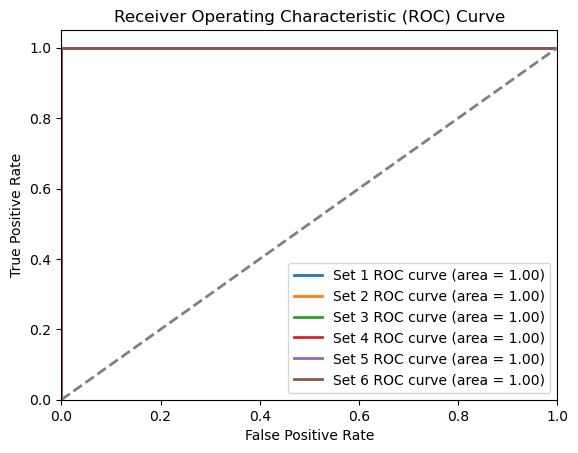

In [11]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Example lists of y_holdout and y_holdout_proba
# Each element in the list is an array corresponding to a different set of values
y_holdout_list = true_log
y_holdout_proba_list = y_pred_proba # replace with actual data

# Plot ROC curves for each set of values on the same figure
plt.figure()

for i, (y_holdout, y_holdout_proba) in enumerate(zip(y_holdout_list, y_holdout_proba_list)):
    roc_auc = roc_auc_score(y_holdout, y_holdout_proba)
    fpr, tpr, thresholds = roc_curve(y_holdout, y_holdout_proba)
    plt.plot(fpr, tpr, lw=2, label=f'Set {i+1} ROC curve (area = {roc_auc:.2f})')

# Plot the diagonal line
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



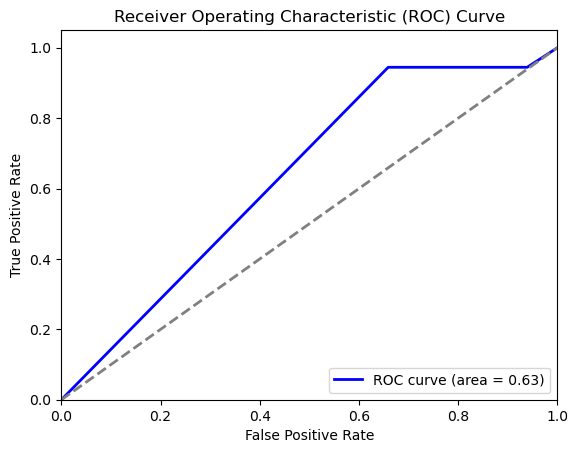

In [4]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
roc_auc = roc_auc_score(y_holdout, y_holdout_proba)
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_holdout, y_holdout_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# import xgboost as xgb
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix

# # Split data into holdout set and remaining set
# train_indices, holdout_indices = train_test_split(np.arange(len(X)), test_size=500, random_state=42, stratify=y)
# X_train, X_holdout = X[train_indices], X[holdout_indices]
# y_train, y_holdout = y[train_indices], y[holdout_indices]

# # Check class distribution
# print("Class distribution in training set:", np.bincount(y_train.astype(int)))
# print("Class distribution in holdout set:", np.bincount(y_holdout.astype(int)))

# # Create a DMatrix for XGBoost
# dtrain = xgb.DMatrix(X_train, label=y_train)
# dholdout = xgb.DMatrix(X_holdout, label=y_holdout)

# # Define a simple parameter grid for hyperparameter tuning
# param_grid = {
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.1, 0.3],
#     'n_estimators': [100, 200, 300],
#     'scale_pos_weight': [np.sum(y_train == 0) / np.sum(y_train == 1)]  # Adjust for class imbalance
# }

# # Initialize a XGBoost model
# xgb_model = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss')

# # Perform Grid Search with Cross-Validation
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=cv, verbose=1, n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # Print the best parameters found
# print(f'Best parameters found: {grid_search.best_params_}')
# print(f'Best cross-validation accuracy: {grid_search.best_score_:.5f}')

# # Train the final model with the best parameters
# best_model = grid_search.best_estimator_
# best_model.fit(X_train, y_train)

# # Evaluate the final model on the holdout set
# y_holdout_pred = best_model.predict(X_holdout)
# accuracy = accuracy_score(y_holdout, y_holdout_pred)
# precision = precision_score(y_holdout, y_holdout_pred)
# recall = recall_score(y_holdout, y_holdout_pred)

# print(f'Final Model Accuracy on Holdout Set: {accuracy * 100:.2f}%')
# print(f'Holdout Set Precision: {precision * 100:.2f}%')
# print(f'Holdout Set Recall: {recall * 100:.2f}%')

# # Confusion Matrix
# cm = confusion_matrix(y_holdout, y_holdout_pred)
# print("Confusion Matrix:")
# print(cm)


In [ ]:
# import xgboost as xgb
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, roc_auc_score


# # Split data into holdout set and remaining set
# train_indices, holdout_indices = train_test_split(np.arange(len(X)), test_size=500, random_state=42, stratify=y)
# X_train, X_holdout = X[train_indices], X[holdout_indices]
# y_train, y_holdout = y[train_indices], y[holdout_indices]

# # Check class distribution
# print("Class distribution in training set:", np.bincount(y_train.astype(int)))
# print("Class distribution in holdout set:", np.bincount(y_holdout.astype(int)))

# # Initialize a simple XGBoost model
# xgb_model = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss', scale_pos_weight=np.sum(y_train == 0) / np.sum(y_train == 1))

# # Perform Cross-Validation
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=cv, scoring='accuracy')
# print(f'Cross-validation scores: {cv_scores}')
# print(f'Mean cross-validation accuracy: {cv_scores.mean():.5f}')

# # Train the final model on the entire training set
# xgb_model.fit(X_train, y_train)

# # Evaluate the final model on the holdout set
# y_holdout_pred = xgb_model.predict(X_holdout)
# accuracy = accuracy_score(y_holdout, y_holdout_pred)
# precision = precision_score(y_holdout, y_holdout_pred)
# recall = recall_score(y_holdout, y_holdout_pred)
# roc_auc = roc_auc_score(y_holdout, y_holdout_pred)

# print(f'Final Model Accuracy on Holdout Set: {accuracy * 100:.2f}%')
# print(f'Holdout Set Precision: {precision * 100:.2f}%')
# print(f'Holdout Set Recall: {recall * 100:.2f}%')
# print(f'Holdout Set ROC AUC: {roc_auc * 100:.2f}%')

# # Confusion Matrix
# cm = confusion_matrix(y_holdout, y_holdout_pred)
# print("Confusion Matrix:")
# print(cm)


In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Train the model to inspect feature importance
xgb_model = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss', scale_pos_weight=np.sum(y_train == 0) / np.sum(y_train == 1))
xgb_model.fit(X_train, y_train)

# Plot feature importance
xgb.plot_importance(xgb_model, max_num_features=20)
plt.show()


In [ ]:
# Inspect random samples
sample_indices = np.random.choice(train_indices, size=5, replace=False)
print(data.iloc[sample_indices])
print(y_pred.iloc[sample_indices])


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, confusion_matrix

# Train logistic regression
logreg = LogisticRegression(class_weight='balanced', max_iter=1000)
logreg.fit(X_train, y_train)

# Evaluate on holdout set
y_holdout_pred = logreg.predict(X_holdout)
accuracy = accuracy_score(y_holdout, y_holdout_pred)
precision = precision_score(y_holdout, y_holdout_pred)
recall = recall_score(y_holdout, y_holdout_pred)
roc_auc = roc_auc_score(y_holdout, y_holdout_pred)

print(f'Logistic Regression Accuracy on Holdout Set: {accuracy * 100:.2f}%')
print(f'Logistic Regression Precision: {precision * 100:.2f}%')
print(f'Logistic Regression Recall: {recall * 100:.2f}%')
print(f'Logistic Regression ROC AUC: {roc_auc * 100:.2f}%')

# Confusion Matrix
cm = confusion_matrix(y_holdout, y_holdout_pred)
print("Confusion Matrix:")
print(cm)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate on holdout set
y_holdout_pred = rf.predict(X_holdout)
accuracy = accuracy_score(y_holdout, y_holdout_pred)
precision = precision_score(y_holdout, y_holdout_pred)
recall = recall_score(y_holdout, y_holdout_pred)
roc_auc = roc_auc_score(y_holdout, y_holdout_pred)

print(f'Random Forest Accuracy on Holdout Set: {accuracy * 100:.2f}%')
print(f'Random Forest Precision: {precision * 100:.2f}%')
print(f'Random Forest Recall: {recall * 100:.2f}%')
print(f'Random Forest ROC AUC: {roc_auc * 100:.2f}%')

# Confusion Matrix
cm = confusion_matrix(y_holdout, y_holdout_pred)
print("Confusion Matrix:")
print(cm)


In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Train XGBoost on augmented data
xgb_model.fit(X_train_res, y_train_res)

# Evaluate on holdout set
y_holdout_pred = xgb_model.predict(X_holdout)
accuracy = accuracy_score(y_holdout, y_holdout_pred)
precision = precision_score(y_holdout, y_holdout_pred)
recall = recall_score(y_holdout, y_holdout_pred)
roc_auc = roc_auc_score(y_holdout, y_holdout_pred)

print(f'SMOTE XGBoost Accuracy on Holdout Set: {accuracy * 100:.2f}%')
print(f'SMOTE XGBoost Precision: {precision * 100:.2f}%')
print(f'SMOTE XGBoost Recall: {recall * 100:.2f}%')
print(f'SMOTE XGBoost ROC AUC: {roc_auc * 100:.2f}%')

# Confusion Matrix
cm = confusion_matrix(y_holdout, y_holdout_pred)
print("Confusion Matrix:")
print(cm)
